In [2]:
import pandas as pd
import numpy as np
df = pd.read_csv('selfharm.csv')
    

In [3]:
#feaeture selection

df = df[['title','text']]
df.head()


,title,text
0,"Divine Intervention(TW: Depression, suicidal t...",This is a moment in my life when I felt my low...
1,For those who need to escape reality I found a...,"\nThe name is ""orange"". Found it on crunchyrol..."
2,I ab*se my medicine when I'm depressed (Tw),Title basically explains the trigger...\n\n\nB...
3,*tw: mentions sh and depression*,"Thanks to my best friend and my parents, I’m c..."
4,Being manic and depressed at the same time is ...,"Like I really want to *scream* right now, but ..."


In [5]:
# Data cleaning 

import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer

nltk.download('stopwords')

stop_words = set(stopwords.words('english'))
stemmer = PorterStemmer()

df['text'] = df['text'].fillna('')
df['title'] = df['title'].fillna('')

corpus = []

for i in range(len(df)):
    review = re.sub('[^a-zA-Z]', ' ', str(df.iloc[i,0]) + ' ' + str(df.iloc[i,1]))
    review = review.lower()
    review = review.split()
    review = [stemmer.stem(word) for word in review if not word in stop_words]
    review = ' '.join(review)
    corpus.append(review)



[nltk_data] Downloading package stopwords to C:\Users\HIMANSHU
[nltk_data]     RATHORE\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [7]:
# Sentiment analyisis 
from textblob import TextBlob

sentiments = []

for text in corpus:
    blob = TextBlob(text)
    sentiments.append(blob.sentiment.polarity)

df['sentiment'] = sentiments
df.head()

,title,text,sentiment
0,"Divine Intervention(TW: Depression, suicidal t...",This is a moment in my life when I felt my low...,-0.116667
1,For those who need to escape reality I found a...,"\nThe name is ""orange"". Found it on crunchyrol...",0.109207
2,I ab*se my medicine when I'm depressed (Tw),Title basically explains the trigger...\n\n\nB...,0.130000
3,*tw: mentions sh and depression*,"Thanks to my best friend and my parents, I’m c...",0.173333
4,Being manic and depressed at the same time is ...,"Like I really want to *scream* right now, but ...",-0.055655


In [10]:
#topic modeling 

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation

vectorizer = CountVectorizer(max_features=1000, ngram_range=(1,2))
X = vectorizer.fit_transform(corpus)

lda = LatentDirichletAllocation(n_components=5, random_state=42)
lda.fit(X)

feature_names = vectorizer.get_feature_names_out()
topics = {}

for i, topic in enumerate(lda.components_):
    topic_words = [feature_names[j] for j in topic.argsort()[:-11:-1]]
    topics['Topic {}'.format(i)] = topic_words

for key, value in topics.items():
    print(key,value)

Topic 0 ['cut', 'know', 'get', 'go', 'like', 'time', 'want', 'day', 'start', 'realli']
Topic 1 ['wanna', 'cut', 'wanna cut', 'cut wanna', 'http', 'com', 'http www', 'www', 'http youtu', 'youtu']
Topic 2 ['cut', 'feel', 'like', 'time', 'trigger', 'realli', 'trigger warn', 'warn', 'first', 'sh']
Topic 3 ['feel', 'want', 'like', 'im', 'feel like', 'know', 'cut', 'fuck', 'get', 'think']
Topic 4 ['self', 'harm', 'self harm', 'trigger', 'warn', 'know', 'scar', 'trigger warn', 'like', 'peopl']


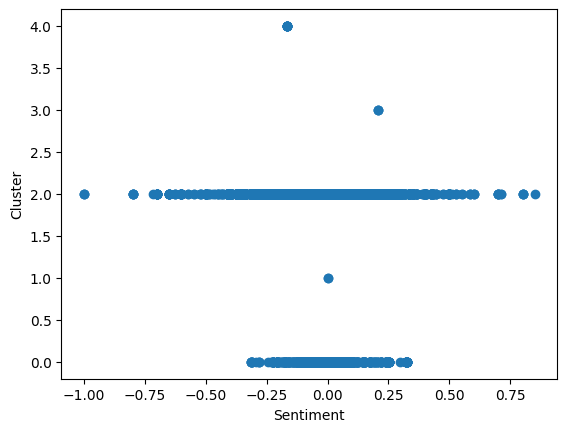

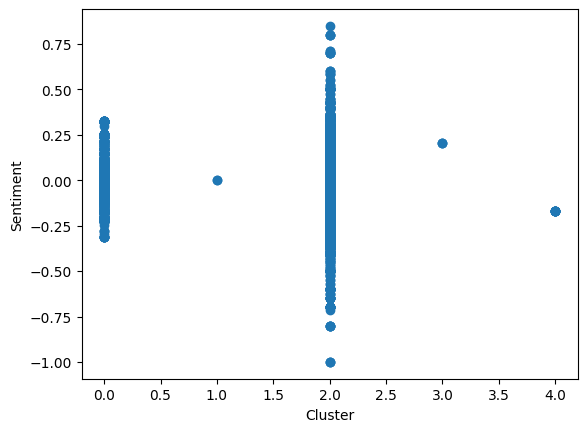

In [11]:
#CLUSTERLINGG

from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

kmeans = KMeans(n_clusters=5, random_state=42)
kmeans.fit(X)

df['cluster'] = kmeans.predict(X)

plt.scatter(df['sentiment'], df['cluster'])
plt.xlabel('Sentiment')
plt.ylabel('Cluster')
plt.show()

plt.scatter(df['cluster'], df['sentiment'])
plt.xlabel('Cluster')
plt.ylabel('Sentiment')
plt.show()